In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
#Loading Training Data
data=pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [40]:
#Loading Test CSV
Test_data=pd.read_csv('test.csv')
Test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [41]:
#Number of unique values in each column
data.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [42]:
Test_data.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

In [43]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [45]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [46]:
#find missing values
print('data:',data.isnull().sum(),'\n')
print('Test_data:',Test_data.isnull().sum())

data: PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64 

Test_data: PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [47]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [48]:
Test_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [49]:
#converting CryoSleep and VIP columns to boolean dtype on Train data
data['CryoSleep']=data['CryoSleep'].astype(bool)
data['VIP']=data['VIP'].astype(bool)
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [50]:
#converting CryoSleep and VIP columns to boolean dtype on Test data
Test_data['CryoSleep']=Test_data['CryoSleep'].astype(bool)
Test_data['VIP']=Test_data['VIP'].astype(bool)
Test_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [51]:
#selecting only categorical and binary columns
cat_cols=data.drop(['PassengerId','Cabin','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1)
cat_cols

,HomePlanet,CryoSleep,Destination,VIP,Transported
0,Europa,False,TRAPPIST-1e,False,False
1,Earth,False,TRAPPIST-1e,False,True
2,Europa,False,TRAPPIST-1e,True,False
3,Europa,False,TRAPPIST-1e,False,False
4,Earth,False,TRAPPIST-1e,False,True
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,False
8689,Earth,True,PSO J318.5-22,False,False
8690,Earth,False,TRAPPIST-1e,False,True
8691,Europa,False,55 Cancri e,False,False


In [52]:
#categorical columns Unique values
for i in cat_cols:
    print('{}'.format(i), ': ',cat_cols['{}'.format(i)].unique())

HomePlanet :  ['Europa' 'Earth' 'Mars' nan]
CryoSleep :  [False  True]
Destination :  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP :  [False  True]
Transported :  [False  True]


In [53]:
#categorical columns Value counts of each unique values
for i in cat_cols:
    print('')
    print('{}:'.format(i))
    print(cat_cols['{}'.format(i)].value_counts())


HomePlanet:
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

CryoSleep:
False    5439
True     3254
Name: CryoSleep, dtype: int64

Destination:
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

VIP:
False    8291
True      402
Name: VIP, dtype: int64

Transported:
True     4378
False    4315
Name: Transported, dtype: int64


In [54]:
#Selecting only numerical/continuous columns
num_cols=cat_cols=data.select_dtypes(include=['float64','int64'])
num_cols

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [55]:
#Statistics of num_cols
for i in num_cols:
    print('')
    print('{}'.format(i))
    print(num_cols['{}'.format(i)].describe())


Age
count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

RoomService
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

FoodCourt
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

ShoppingMall
count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

Spa
count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.0000

<AxesSubplot:>

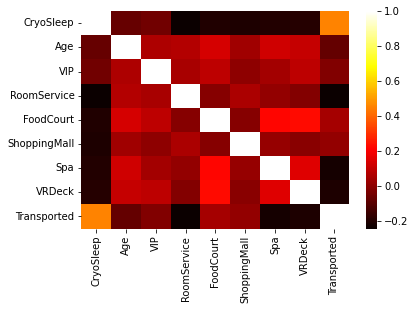

In [56]:
#data correlation
corr=data.corr()
sns.heatmap(corr,cmap='hot')

# Splitting Cabin column to deck/number/side columns

In [57]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [58]:
# dropping null value columns to avoid errors
data.dropna(inplace = True)

In [59]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [60]:
# new data frame with split value columns
new = data["Cabin"].str.split("/", n = 2, expand = True)

# making separate Deck column from data
data["Deck"]= new[0]
  
# making separate Number column from data
data["Number"]= new[1]

# making separate Side column from data
data["Side"]= new[2]

  
# Dropping old Name columns
data.drop(columns =["Cabin"], inplace = True)
  
# df display
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


# Splitting Name Columns to First Name and Last Name

In [61]:
# dropping null value columns to avoid errors
data.dropna(inplace = True)
  
# new data frame with split value columns
new = data["Name"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
data["First Name"]= new[0]
  
# making separate last name column from new data frame
data["Last Name"]= new[1]
  
# Dropping old Name columns
data.drop(columns =["Name"], inplace = True)
  
# df display
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side,First Name,Last Name
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Juanna,Vines
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Altark,Susent
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Solam,Susent
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,Gravior,Noxnuther
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,Kurta,Mondalley
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,Fayey,Connon
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,Celeon,Hontichre


# Filling Missing Data 

In [62]:
#data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].mode().iloc[0])
#data['Destination']=data['Destination'].fillna(data['Destination'].mode().iloc[0])

In [63]:
#data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Number          0
Side            0
First Name      0
Last Name       0
dtype: int64

In [66]:
#data.info()

In [67]:
#Removing Passengerid and Name columns for Train data
#data=data.drop(['PassengerId', 'Name'],axis=1)

In [68]:
#Removing Passengerid and Name columns for Test data
#Test_data=Test_data.drop(['PassengerId', 'Name'],axis=1)

# Experimenting

In [ ]:
#***Logistic Regression***

In [ ]:
#try label encoding for Train Data
label_encoder = preprocessing.LabelEncoder()
data['HomePlanet']= label_encoder.fit_transform(data['HomePlanet']) 
print(data['HomePlanet'].value_counts(),'\n')
data['Destination']= label_encoder.fit_transform(data['Destination']) 
print(data['Destination'].value_counts())

In [ ]:
#try label encoding for Test Data
Test_data['HomePlanet']= label_encoder.fit_transform(Test_data['HomePlanet']) 
print(Test_data['HomePlanet'].value_counts(),'\n')
Test_data['Destination']= label_encoder.fit_transform(Test_data['Destination']) 
print(Test_data['Destination'].value_counts())

In [ ]:
data=data.drop(['Cabin'],axis=1) #Remove Cabin column for Train Data
rem_mv=data.dropna() #Removed any row with missing values for Train Data
print('Train Data')
print('data:',len(data),'rem_mv:',len(rem_mv))

In [ ]:
Test_data=Test_data.drop(['Cabin'],axis=1) #Remove Cabin column for Test Data
Fin_Test_data=Test_data.dropna() #Removed any row with missing values for Test Data
print('Test Data')
print('Test_data:',len(Test_data),'Fin_Test_data:',len(Fin_Test_data))

In [ ]:
#X=rem_mv.select_dtypes(include=['number','bool']).iloc[0:,0:8]
X=rem_mv.iloc[0:,0:10]
X

In [ ]:
y=rem_mv.iloc[0:,-1]
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
y_pred

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1",metrics.f1_score(y_test,y_pred))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#ypred try on test.csv Data
y_pred_Test=logreg.predict(Fin_Test_data)

In [ ]:
y_pred_Test

In [ ]:
len(y_pred)